In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
plt.style.use('seaborn')

### convolution

In [3]:
img_bgr = cv2.imread('../images/cat0.jpg')
img_bgr = cv2.resize(img_bgr, (200, 200))

In [4]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

In [5]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

In [6]:
def drawImage(img, title = "img", c = None):
    plt.imshow(img, cmap=c)
    plt.axis('off')
    plt.title(title + str(img.shape))
    plt.show()

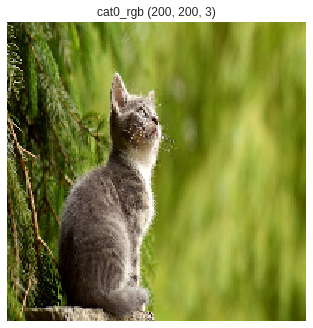

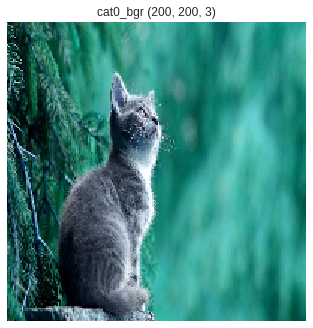

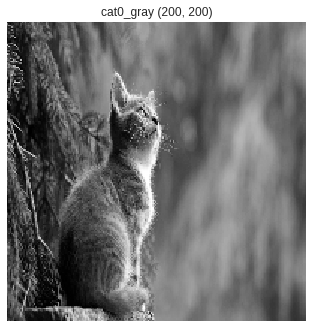

In [7]:
drawImage(img_rgb, title='cat0_rgb ') # original color
drawImage(img_bgr, title='cat0_bgr ') # original color
drawImage(img_gray, title='cat0_gray ', c='gray') # original color


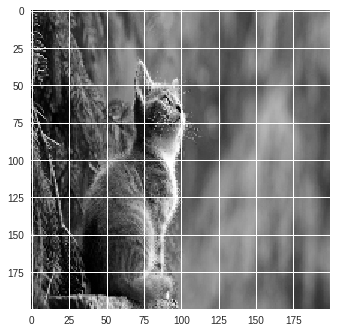

In [8]:
plt.imshow(img_gray, cmap = "gray");

In [9]:
def convolution(img, img_filter):
    
    w, h = img.shape[0], img.shape[1]
    f = img_filter.shape[0] # assuming that filter is square matrix
    
    wc = w - f + 1
    hc = h - f + 1
    conv = np.empty((wc, hc))
    
    for h in range(hc):
        for w in range(wc):
            conv[h, w] = np.einsum('ij,ij',img[h:h+f, w:w+f], img_filter)
            if conv[h, w] > 255:
                conv[h, w] = 255
            elif conv[h, w] < 0:
                conv[h, w] = 0
    
    return conv

In [10]:
# define filter 
blur = np.ones((3, 3))/9.0

In [15]:
blured_img = convolution(img_gray, blur)

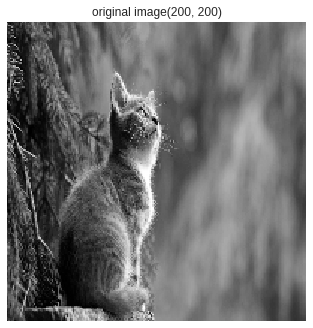

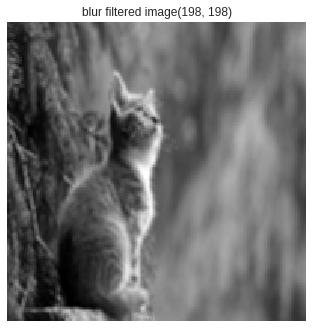

In [16]:
drawImage(img_gray, title='original image', c='gray')
drawImage(blured_img, title='blur filtered image', c='gray')

In [17]:
d_blur = np.linalg.pinv(np.ones((3, 3))/9.0)

In [18]:
d_blured = convolution(blured_img, d_blur) 

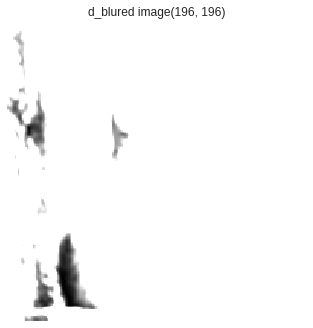

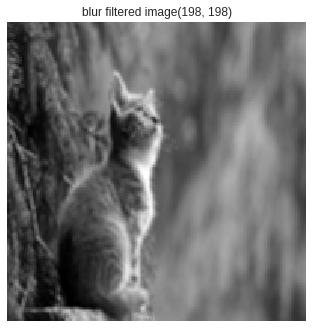

In [19]:
drawImage(d_blured, title='d_blured image', c='gray')
drawImage(blured_img, title='blur filtered image', c='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


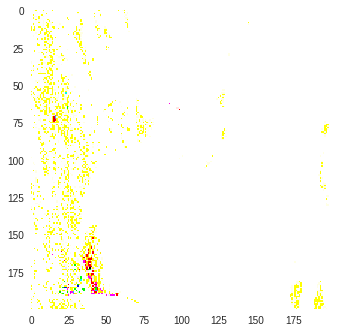

In [25]:
plt.imshow(img_rgb*);

In [13]:
# another filter
edge = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

In [14]:
img_edge = convolution(img_gray, edge)

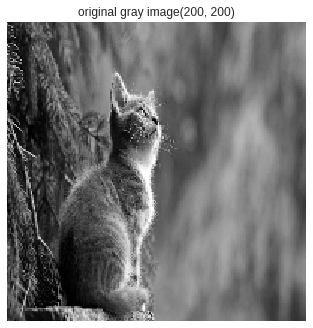

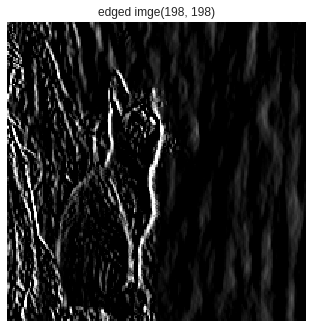

In [15]:
drawImage(img_gray, title='original gray image', c='gray')
drawImage(img_edge, title='edged imge', c='gray')

In [16]:
# filters acts as feature extractor

### convolutional layer
- contains vrious filters
- each filter extracts different kind of features and gives one activation map
- so CNN takes input a volume and produces output volume of different shape

In [17]:
blurred_img.shape

(198, 198)

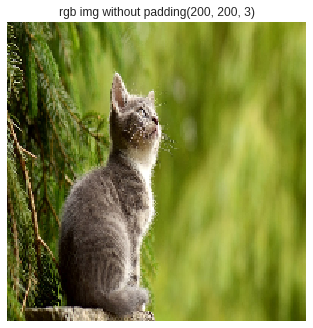

In [18]:
drawImage(img_rgb, title='rgb img without padding', c='gray')

#### padding

In [19]:
pad_img = np.pad(img_rgb, ((10, 10), (10, 10), (0, 0)), 'mean')

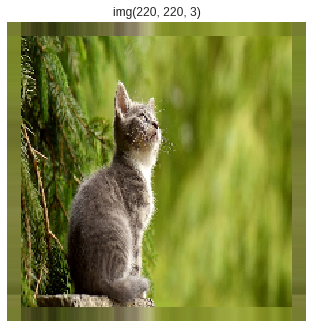

In [20]:
drawImage(pad_img)

#### pooling

In [21]:
def pooling(filtered_img, pooling_filter_size = 2, stride = 2):
    wi, hi = filtered_img.shape[0], filtered_img.shape[1]
    f = pooling_filter_size
    
    wc = (wi - f)//stride + 1
    hc = (hi - f)//stride + 1
    pool = np.empty((wc, hc))
    
    for h in range(hc):
        for w in range(wc):
            pool[h, w] = np.amax(filtered_img[h*stride:h*stride+f, w*stride:w*stride+f])
    return pool
    

In [22]:
arr = np.array([[0, 155], [134, 156]])

In [23]:
pool  = pooling(img_edge, pooling_filter_size=4, stride=4)

In [24]:
print(img_edge.shape, pool.shape)

(198, 198) (49, 49)


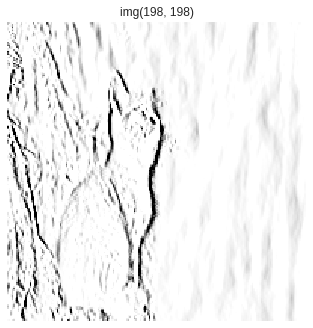

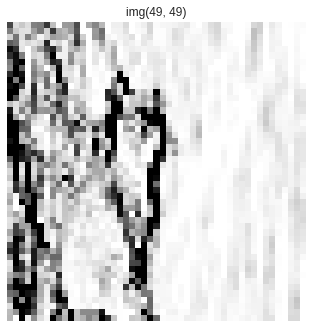

In [25]:
drawImage(img_edge)
drawImage(pool)